In [1]:
from lenscarf.iterators.statics import rec as Rec
import matplotlib.pyplot as plt
from plancklens import utils
import healpy as hp

In [2]:
direc = "/Users/omard/Downloads/SCRATCHFOLDER/n32/S4WebskyWebskyBorn/lenscarfrecs/"

In [14]:
R = Rec()
plms = R.load_plms(direc+"ptt_sim0000gauss", list(range(16)))
"""plmsa = R.load_plms(direc+"ptt_sim0000anisofilter", [0, 1, 2])
plmsa_bh = R.load_plms(direc+"ptt_bh_s_sim0000anisofilterbhwrongs2", [0, 1, 2])
plmsfastwf = R.load_plms(direc+"ptt_sim0000fastwf", [0, 1, 2])
"""


plmin = hp.read_alm("/Users/omard/Downloads/SCRATCHFOLDER/n32/S4WebskyWebskyBorn/cmbs/plm_in_0_lmax5120.fits")
plmin = utils.alm_copy(plmin, lmax=hp.Alm.getlmax(plms[0].size))

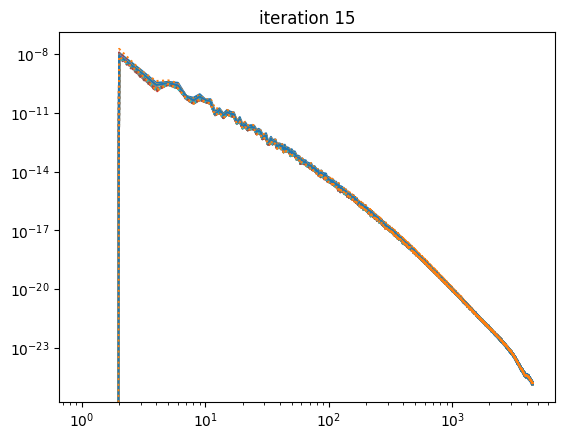

In [15]:
it = 0

inin = hp.alm2cl(plmin)

corrs = {}
autos = {}

for p in plms:

    temp = {}

    plt.title(f"iteration {it}")
    cl = hp.alm2cl(p, plmin)
    temp["iso"] = cl

    corrs[it] = temp

    plt.loglog(cl)

    #plot autos too
    plt.loglog(hp.alm2cl(p), ls = ":")

    temp["iso"] = hp.alm2cl(p)
    autos[it] = temp
    it += 1
    
plt.show()

/var/folders/5s/mpby42n15_ng7rv494cv19tw0000gn/T/ipykernel_63382/1796511036.py:6: RuntimeWarning: invalid value encountered in divide
  WF = a[k] / inin


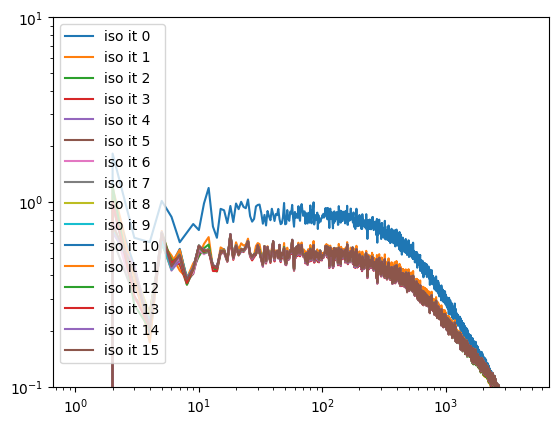

In [16]:
WFs = {}
for it in autos.keys():
    a = autos[it]
    c = corrs[it]
    for k in a.keys():
        WF = a[k] / inin
        plt.loglog(WF, label = f"{k} it {it}")
    WFs[it] = WF
plt.legend()
plt.ylim(0.1, 10)
plt.show()

/var/folders/5s/mpby42n15_ng7rv494cv19tw0000gn/T/ipykernel_63382/493675433.py:20: RuntimeWarning: invalid value encountered in divide
  plt.loglog(l**4*hp.alm2cl(p)/WFs[it]**2, label = f"it {it}", ls = ls)


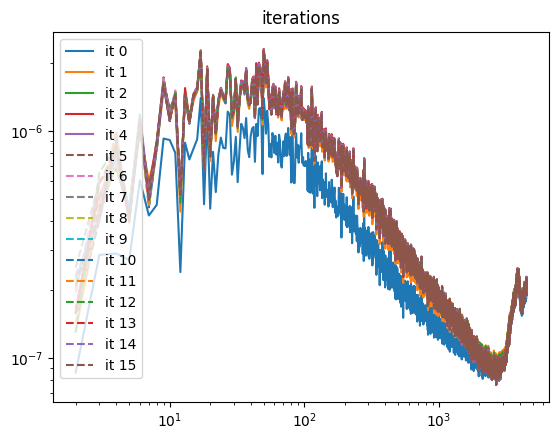

In [17]:
it = 0

inin = hp.alm2cl(plmin)

corrs = {}
autos = {}

import numpy as np

l = np.arange(0, len(inin))

plt.title(f"iterations")
for p in plms:

    temp = {}

    #plot autos too

    ls = "-" if it < 5 else "--"
    plt.loglog(l**4*hp.alm2cl(p)/WFs[it]**2, label = f"it {it}", ls = ls)
    it += 1
    
plt.legend()
plt.show()

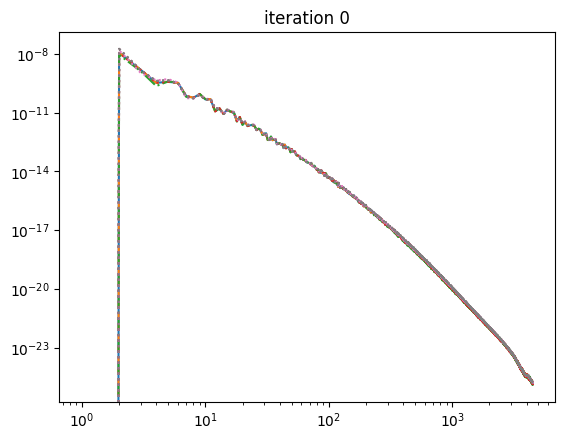

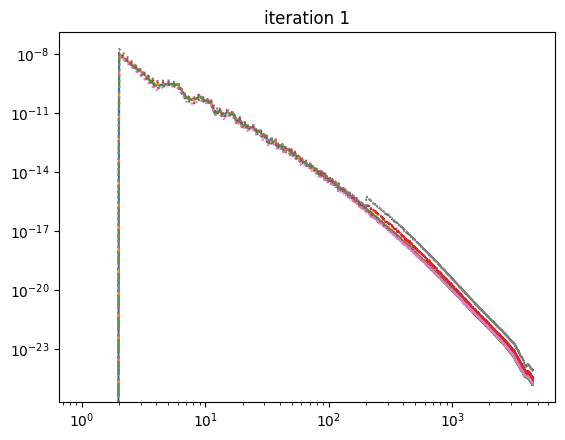

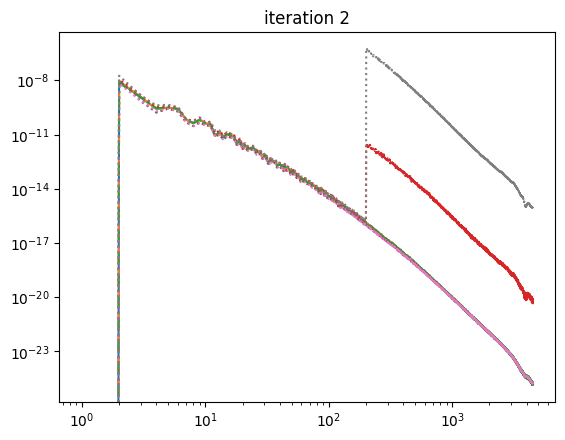

In [41]:
it = 0

inin = hp.alm2cl(plmin)

corrs = {}
autos = {}

for p, pa, pabh, pwf in zip(plms, plmsa, plmsa_bh, plmsfastwf):

    temp = {}

    plt.title(f"iteration {it}")
    cl = hp.alm2cl(p, plmin)
    cla = hp.alm2cl(pa, plmin)
    clabh = hp.alm2cl(pabh, plmin)
    clwf = hp.alm2cl(pwf, plmin)
    temp["iso"] = cl
    temp["aniso"] = cla
    temp["aniso_bh"] = clabh
    temp["fastwf"] = clwf

    corrs[it] = temp

    plt.loglog(cl)
    plt.loglog(cla, ls = "--")
    plt.loglog(clabh, ls = "-.")
    plt.loglog(clwf, ls = ":")

    #plot autos too
    plt.loglog(hp.alm2cl(p), ls = ":")
    plt.loglog(hp.alm2cl(pa), ls = ":")
    plt.loglog(hp.alm2cl(pabh), ls = ":")
    plt.loglog(hp.alm2cl(pwf), ls = ":")

    temp["iso"] = hp.alm2cl(p)
    temp["aniso"] = hp.alm2cl(pa)
    temp["aniso_bh"] = hp.alm2cl(pabh)
    temp["fastwf"] = hp.alm2cl(pwf)

    autos[it] = temp


    plt.show()
    it += 1

/var/folders/5s/mpby42n15_ng7rv494cv19tw0000gn/T/ipykernel_47432/210740078.py:5: RuntimeWarning: invalid value encountered in divide
  WF = a[k] / inin


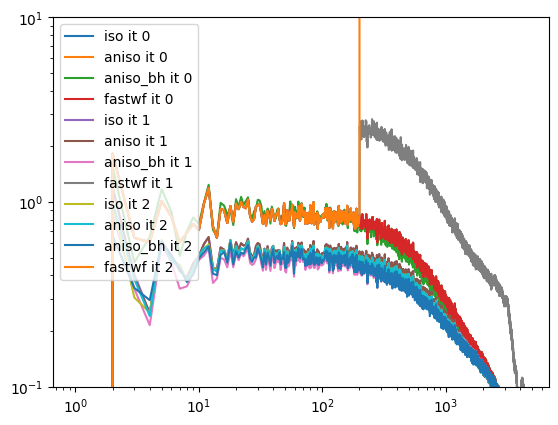

In [46]:
for it in autos.keys():
    a = autos[it]
    c = corrs[it]
    for k in a.keys():
        WF = a[k] / inin
        plt.loglog(WF, label = f"{k} it {it}")
plt.legend()
plt.ylim(0.1, 10)
plt.show()